# **Assignment 2**
# **Planck function**

### **Data Analysis for Space Weather | Instructor: Prof Podladchikova | April, 2021**
### **by Victoria Krivova, Polina Starodumova**

The Planck function 𝐵 describes the spectral flux density of the radiation emitted by a black body (i.e. a perfect emitter) in thermal equilibrium at a temperature 𝑇. The Planck function serves as a very good approximation for the radiation emitted at each wavelength by a starwith a certain temperature, given as:  
![альт](https://i.stack.imgur.com/3ugsV.png)  
with temperature 𝑇, wavelength λ, Planck constant ℎ, Boltzmann constant 𝑘, and speed of light 𝑐. 

In [ ]:
# importing the neccessary libraries and physical constants
import scipy
from scipy import constants
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c = scipy.constants.c # speed of light
h = scipy.constants.h # Planck constant
k = scipy.constants.k # Boltzmann constant

**Let's write a function that implements Planck's law. Inputs are temperature *T* of a black body and wavelength *λ* of radiation:**

In [ ]:
def plank(temp, lamb):
    B = 2 * h * (c ** 2) / (lamb ** 5) / (math.exp(h * c / lamb / k / temp) - 1)
    return B

**Calculating the Planck function for three stars of different temperatures, emitting within range between 20 and 4000 nm:**

In [ ]:
# their temperatures, in K
t1 = 4000
t2 = 5772 # the SUN
t3 = 8000

# wavelengths range, in nm
lamb_range = np.arange(20, 4005, 5) # step – 5 nm

radiation_t1 = []
for i in range(len(lamb_range)):
    radiation_t1.append(plank(t1, lamb_range[i] / 10 ** 9)) # converted wavelength from nm to m

radiation_t2 = []
for i in range(len(lamb_range)):
    radiation_t2.append(plank(t2, lamb_range[i] / 10 ** 9)) 

radiation_t3 = []
for i in range(len(lamb_range)):
    radiation_t3.append(plank(t3, lamb_range[i] / 10 ** 9))

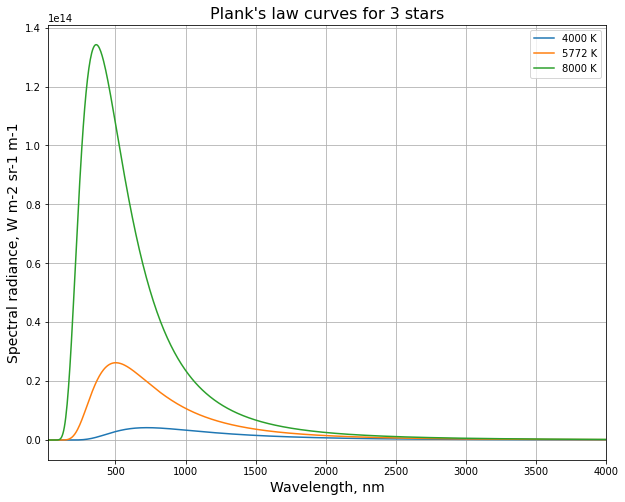

In [ ]:
# plotting the Planck's law as a function of wavelength for given stars
plt.figure(figsize=(10, 8))
plt.plot(lamb_range, radiation_t1)
plt.plot(lamb_range, radiation_t2)
plt.plot(lamb_range, radiation_t3)
plt.title("Plank's law curves for 3 stars", fontsize = 16)
plt.xlabel('Wavelength, nm', fontsize = 14)
plt.xlim(20, 4000)
plt.ylabel('Spectral radiance, W m-2 sr-1 m-1', fontsize = 14)
plt.legend(['4000 K', '5772 K', '8000 K'])
plt.grid(True)

**Looking at them plotted together we can see that the curve corresponding to hotter star has higher "peak" (lies above curves for colder stars) thus it has the highest radiation, what is expected from Planck's formula.**

**Then for every temperature let's derive numerically the value of wavelength where Planck function of radiance has its maximum:**

In [ ]:
# using index of maximum value in array of radiances for wavelengths array
lamb_max1_P = lamb_range[pd.Series(radiation_t1).idxmax(axis=0)]
lamb_max2_P = lamb_range[pd.Series(radiation_t2).idxmax(axis=0)]
lamb_max3_P = lamb_range[pd.Series(radiation_t3).idxmax(axis=0)]

**And also calculate the analytical value of required wavelengths from Wien’s displacement law:**.  
![pic](https://www.nuclear-power.net/wp-content/uploads/Wien%E2%80%99s-Displacement-Law-equation.png)

In [ ]:
b = 2.898 / 10 ** 3 # in m * K

lamb_max1_W = b / t1 * 10**9 # converted wavelength from m to nm
lamb_max2_W = b / t2 * 10**9
lamb_max3_W = b / t3 * 10**9

**Comparing obtaimed values:**

In [ ]:
stars_radiance = pd.DataFrame(columns = ['Temperature of a star, K', 'Lambda where Planck func is max, nm', "Lambda from Wien's law, nm"], data = [
    [t1, lamb_max1_P, round(lamb_max1_W, 1)], [t2, lamb_max2_P, round(lamb_max2_W, 1)], [t3, lamb_max3_P, round(lamb_max3_W, 1)]                                                                                                                              
])

stars_radiance

,"Temperature of a star, K","Lambda where Planck func is max, nm","Lambda from Wien's law, nm"
0,4000,725,724.5
1,5772,500,502.1
2,8000,360,362.2


**One can see values are approximately equal although they are obtained from Planck's and Wien's law, which were derived independently in 1893 and 1900 respectively, basing on the similar physical concepts.**


**Stars under our consideration emit the maximum of their radiation within range between 360 and 730 nm. What is noticable here, 380-750 nm is the visible (optical) spectrum of sunlight. This similarity can be explained by the fact that visible light is emitted by the Sun's photosphere layer and its temperature decreases from 6500 K to 4100 K due to the energy loss by this radiation. And temperature range is close to the one we made calculations for. What is more, most of the Sun's radiation is emitted by photosphere.**

 **Let's write a function that calculates numerically integral of the Planck function over wide range of wavelengths:**


In [ ]:
# approximation here is summing up the squares of thin bins under numerical curve 
def integral(temp, lamb_arr):
    I = 0
    for i in range(len(lamb_arr) - 1):
        dlamb = (lamb_arr[i + 1] - lamb_arr[i]) / 10 ** 9 # everything is calculated in m, wavelenghts here in nm
        lamb_mean = (lamb_arr[i + 1] + lamb_arr[i]) / 2
        bin_square = dlamb * plank(temp, lamb_mean / 10 ** 9) # Planck func uses meters, lambdas in nm
        I += bin_square
    return I

**Now the total radiation flux density F of the stars with given temperatures can be derived:**

In [ ]:
# range of wavelengths from 10 to 10000 nm
lamb_range_full = np.arange(10, 10000, 5) # in nm

# t1 = 4000 K, t3 = 8000 K
t4 = 12000 # in K

# calculating density f for 3 given stars 
f_t1 = integral(t1, lamb_range_full)
f_t3 = integral(t3, lamb_range_full)
f_t4 = integral(t4, lamb_range_full)

**Let's compare the densities from these three stars:**


In [ ]:
print('Unit of flux density is W m^−2 sr^−1')
print()
print('For star with {} K radiation flux density is {:.0f} units'.format(t1, f_t1))
print('For star with {} K radiation flux density is {:.0f} units, {} times larger'.format(t3, f_t3, round(f_t3 / f_t1), 1))
print()
print('For star with {} K radiation flux density is {:.0f} units'.format(t1, f_t1))
print('For star with {} K radiation flux density is {:.0f} units, {} times larger'.format(t4, f_t4, round(f_t4 / f_t1), 1))


Unit of flux density is W m^−2 sr^−1

For star with 4000 K radiation flux density is 4611003 units
For star with 8000 K radiation flux density is 73909536 units, 16 times larger

For star with 4000 K radiation flux density is 4611003 units
For star with 12000 K radiation flux density is 374239883 units, 81 times larger


**Let's look at the ratio of temperatures compared to ratio of densities. Second one (16 and 81) is the power of 4 of the first one (2x and 3x). That is explained by Stefan–Boltzmann law which tells that black-body radiant emittance is directly proportional to the fourth power of the black body's thermodynamic temperature T: j = σ*T^4**

**Next we calculate the total energy per second emitted by the Sun into all directions – this quantity describes the solar luminosity, absolute measure of radiant power:**

In [ ]:
# multiplying the derived flux density F over the total surface area of the Sun 
# and multiplying by 𝜋 to account for the integration of the radiation over the solid angle 

# Sun has t2 = 5772 K

surface_Sun = 6.09 * 10**18 # in m^2
f_t2 = integral(t2, lamb_range_full)
sun_lum = f_t2 * np.pi * surface_Sun

print('Sun luminosity L from our calculations is {:.3f} * 10^26 W'.format(sun_lum / 10**26))
print('Sun luminosity L defined by IAU is 3.846 * 10^26 W')


Sun luminosity L from our calculations is 3.830 * 10^26 W
Sun luminosity L defined by IAU is 3.846 * 10^26 W


**Obtained result of luminosity is equal to expected one.**

**Now let's calculate how large is the fraction of the solar luminosity that is emitted in the optical part of the spectrum:**

In [ ]:
# define optical spectrum range
lamb_opt = np.arange(380, 755, 5)

# flux density for visible light
f_t2_opt = integral(t2, lamb_opt)

# luminosity emitted in this range
sun_lum_opt = f_t2_opt * np.pi * surface_Sun

# its fraction in the luminosity over all wavelengths
fract = sun_lum_opt / sun_lum

In [ ]:
print('Fraction of the solar luminosity in the optical part of the spectrum is {:.1%}'.format(fract))

Fraction of the solar luminosity in the optical part of the spectrum is 43.8%


**From lecture charts let's recall that contribution to solar irradiance from visible light is 44%. Luminosity L and irradiance I are in linear relation:**  
![pic](https://wikimedia.org/api/rest_v1/media/math/render/svg/d87753e3b57952caaf1bdaafbace70da067e228f)  
**where A is the unit distance and k is a constant ~= 1. Thus we've derived the accurate number for visible light component.**

**Learning log:**  
This assignment encouraged us to implement Planck's law of black body radiation to stars of different temperature including our Sun. On the chart there are a family of curves for different temperatures as a function of a wavelength of emition. Curve corresponding to hotter star is located above to the colder ones. We've learnt to derive the wavelength where radiance has its maximum  with two methods: numerically from Planck's dependace and numerically from Wien's displacement law. It turned out that they provide the same results for stars under our comsideration.  
Next we've worked with the term of total radiation flux density F and obtained its value directly from Planck function. We've found clear systematics between the values of density for stars of different temperature, exactly what is stated by Stefann-Bolzman law – density is proportional to the fourth power of temperature. Eventually using flux density for Sun we've calculated solar luminosity and its compound of visible light.  
Through performing this assignment we've recalled our knowledge on black body, radiation laws, its spectrum and flux density, irradiance and luminosity of a star.